# Feuille 3

L'objectif de ce TP est de **calculer et tracer l'enveloppe convexe d'un
nuage de points du plan**. L'algorithme de ce calcul utilise des piles.
Les notions utiles seront introduites au fur et à mesure.

-   Ce TP peut profiter d'une implémentation python du type de données
    abstrait *pile LIFO*.
-   Le travail demandé sera effectué dans un notebook jupyter basé sur
    ce sujet en format markdown.
-   Dans le notebook, les *modules* demandés pourront être codés par des
    fonctions ou des traitements regroupés dans une cellule. Dans ce
    dernier cas, ces cellules pourront être dupliquées (par recopie)
    “plus loin” dans le notebook.
-   Dans un second temps, les traitements demandés pourront être
    regroupé dans des fichiers python (`.py`) exécutables dpuis la ligne
    de commande.

In [1]:
# on regroupe les imports utiles
from math import sqrt

## `points`: points du plan, relation d'ordre

Un *point* du plan est un couple $(x, y)$ (de nombres flottants).  
On définit la relation d'ordre suivante entre 2 points du plan :  
$$(x,y) \le (x',y') \iff x < x' \text{ ou } (x = x' \text{ et } y \le y').$$  
Un *nuage de points* est un ensemble fini de points.

### `points`

Concevoir et coder un module `points` qui permet de définir des points,
de les comparer, d'afficher leurs coordonnées $(x,y)$ à l'écran.

In [2]:
# points

# annotations de type : on utilise un alias de type 
Points = tuple[float]

# d'autres solutions sont possibles, 
# en particulier a définition de véritables nouveaux types comme :
#from typing import NewType
#Points = NewType('Points', tuple[float])

def point(x: float, y: float) -> Points:
    return (x, y)

def print_point(p: Points) -> None:
      print(p)
        
def le(p1: Points, p2: Points) -> bool:
    if p1[0] < p2[0]:
        return True
    if p1[0] == p2[0] and p1[1] <= p2[1]:
        return True
    return False

In [3]:
# tests unitaires        
origine = point(0. , 0.)
p_i = point(1., 0.)
p_j = point(0., 1.)
p_11 = point(1., 1.)
p_pi3 = point(0.5, sqrt(3)/2)
p_pi6 = point(sqrt(3)/2, 0.5)

for p in (origine, p_i, p_j):
    print_point(p)

print("Comparaison avec origine)")    
for p in (origine, p_i, p_j, p_11, p_pi6, p_pi3):
    print( p, (le(origine, p)) )

(0.0, 0.0)
(1.0, 0.0)
(0.0, 1.0)
Comparaison avec origine)
(0.0, 0.0) True
(1.0, 0.0) True
(0.0, 1.0) True
(1.0, 1.0) True
(0.8660254037844386, 0.5) True
(0.5, 0.8660254037844386) True


## `nuage` : nuage de points : générer, trier, afficher, stocker, tracer

### `nuage`

Ecrire un module `nuage` qui permet de définir un nuage de points de
taille paramétrable et de d'afficher les coordonnées de ses points à
l'écran.

![Un nuage de points aléatoires](./fig/nuage.png)
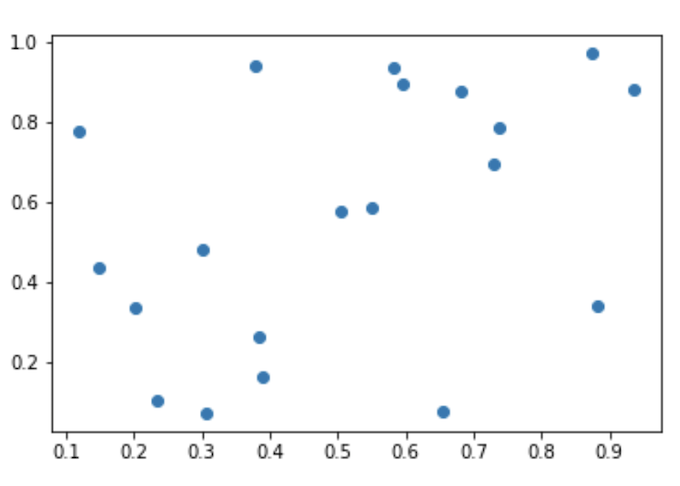

In [4]:
# annotation de type
Nuages = list[Points]

def creer_nuage() -> Nuages:
    return []

def ajouter(point: Points, nuage: Nuages) -> None:
    nuage.append(point)

def nb_points(nuage: Nuages) -> int:
    return len(nuage)

def print_nuage(nuage : Nuages) -> None:
    for p in nuage:
        print_point(p)

In [5]:
print_point(origine)

nuage0 = creer_nuage()
print(nb_points(nuage0))
print_nuage(nuage0)

ajouter(origine, nuage0)
print(nb_points(nuage0))
print_nuage(nuage0)

ajouter(p_i, nuage0)
ajouter(p_j, nuage0)
ajouter(p_11, nuage0)
ajouter(p_pi3, nuage0)
ajouter(p_pi6, nuage0)

print(nb_points(nuage0))
print_nuage(nuage0)

(0.0, 0.0)
0
1
(0.0, 0.0)
6
(0.0, 0.0)
(1.0, 0.0)
(0.0, 1.0)
(1.0, 1.0)
(0.5, 0.8660254037844386)
(0.8660254037844386, 0.5)


### `un_nuage_random()`

Compléter ce module de façon à pouvoir générer aléatoirement un nuage de
points de taille arbitraire et contenu dans le carré
$[0,1] \times [0,1]$.

In [6]:
from random import random

def un_nuage_random(n: int) -> Nuages:
    res = []
    for i in range(n):
        res.append( (random(), random()) )  # parenthese autour de tuple nécessaire comme argument de .append
    return res

In [7]:
nuage1 = un_nuage_random(10)
print(nuage1)

[(0.34650421257373953, 0.07264440517250492), (0.4225864709759589, 0.4360055171769983), (0.41121045890864427, 0.01233777463872121), (0.02509209547541158, 0.7549155481961345), (0.6758480219554566, 0.2633790935806877), (0.31676202114358987, 0.8301859243659836), (0.14091791993170755, 0.14822817527178955), (0.08653168846622294, 0.18619886917098538), (0.9689392301584048, 0.18035614975651626), (0.46845849461610856, 0.103820931787733)]


### `trier_nuage()`

Compléter ce module de façon à pouvoir trier les points d'un nuage donné selon l'ordre croissant défini sur les points du plan.

In [8]:
#on utilise les faciltés des tri de listes
# section Sort Stability and Complex Sorts de
# https://docs.python.org/3/howto/sorting.html
from operator import itemgetter

def trier_nuage(nuage : Nuages ) -> Nuages:
    '''ce tri en place modifie nuage'''
    #res = sorted(nuage, key=itemgetter(0, 1)) # tri abscisses puis ordonnées
    #return res
    return nuage.sort(key=itemgetter(0, 1)) # tri ordonnées
                   

In [9]:
print_nuage(nuage0)
print("---")
nuage0_save = [p for p in nuage0]
print_nuage(nuage0_save)
print("--- on trie")
trier_nuage(nuage0)
print_nuage(nuage0)
print("---")

(0.0, 0.0)
(1.0, 0.0)
(0.0, 1.0)
(1.0, 1.0)
(0.5, 0.8660254037844386)
(0.8660254037844386, 0.5)
---
(0.0, 0.0)
(1.0, 0.0)
(0.0, 1.0)
(1.0, 1.0)
(0.5, 0.8660254037844386)
(0.8660254037844386, 0.5)
--- on trie
(0.0, 0.0)
(0.0, 1.0)
(0.5, 0.8660254037844386)
(0.8660254037844386, 0.5)
(1.0, 0.0)
(1.0, 1.0)
---


In [10]:
print_nuage(nuage1)
trier_nuage(nuage1)
print("---")
print_nuage(nuage1)

(0.34650421257373953, 0.07264440517250492)
(0.4225864709759589, 0.4360055171769983)
(0.41121045890864427, 0.01233777463872121)
(0.02509209547541158, 0.7549155481961345)
(0.6758480219554566, 0.2633790935806877)
(0.31676202114358987, 0.8301859243659836)
(0.14091791993170755, 0.14822817527178955)
(0.08653168846622294, 0.18619886917098538)
(0.9689392301584048, 0.18035614975651626)
(0.46845849461610856, 0.103820931787733)
---
(0.02509209547541158, 0.7549155481961345)
(0.08653168846622294, 0.18619886917098538)
(0.14091791993170755, 0.14822817527178955)
(0.31676202114358987, 0.8301859243659836)
(0.34650421257373953, 0.07264440517250492)
(0.41121045890864427, 0.01233777463872121)
(0.4225864709759589, 0.4360055171769983)
(0.46845849461610856, 0.103820931787733)
(0.6758480219554566, 0.2633790935806877)
(0.9689392301584048, 0.18035614975651626)


### `write_nuage()`

Compléter ce module de façon à pouvoir enregistrer un nuage de points de taille arbitraire dans un fichier de texte. La taille du nuage sera aussi enregistrée dans ce fichier.  
Les fichiers `data_nuage_10.txt` et `data_nuage_100.txt` fournis dans l'archive `3-data-nuage.zip` sont des exemples de tels fichiers.

In [11]:
!cat data_nuage/data_nuage_10.txt

10
0.35044662517603453 0.752560409100197
0.6146125291700566 0.1718278220287821
0.9915968568508445 0.9052980181746246
0.1790001243833701 0.907928983038507
0.8368299880640415 0.36796327718527777
0.8516626625874057 0.7303199659087892
0.18886854415967946 0.11372868297214234
0.6143614302562758 0.2253364938577207
0.6157591487827003 0.2649481888932087
0.4391048164290956 0.47542006680084614


In [12]:
def write_nuage(nuage : Nuages, filename: str) -> None:
# association/ouverture/fermeture avec clause with
    with open("./tmp/"+filename, "w", encoding="utf8") as f:
        f.write( str(len(nuage)) + '\n' )
        for p in nuage:
            f.write( str(p[0]) + ' ' )
            f.write( str(p[1]) + '\n' )

In [13]:
write_nuage(nuage0, "nuage0.txt")

In [14]:
!cat ./tmp/nuage0.txt

6
0.0 0.0
0.0 1.0
0.5 0.8660254037844386
0.8660254037844386 0.5
1.0 0.0
1.0 1.0


### `read_nuage()`

Compléter ce module de façon à pouvoir lire un nuage de points de taille arbitraire à partir d'un fichier de texte selon le format défini ci-dessus.

In [15]:
def read_nuage(filename: str) -> Nuages:
    with open(filename, "r", encoding="utf8") as f:
        res = creer_nuage()
        n = int(f.readline())        
        for i in range(n):
            ligne = f.readline().split(" ") #une list de 2 str
            ajouter( (float(ligne[0]), float(ligne[1])), res )
        return res

In [16]:
nuage0_cp = read_nuage("./tmp/nuage0.txt")
assert nuage0_cp == nuage0

In [17]:
n10 = read_nuage("./data_nuage/data_nuage_10.txt")
print_nuage(n10)

(0.35044662517603453, 0.752560409100197)
(0.6146125291700566, 0.1718278220287821)
(0.9915968568508445, 0.9052980181746246)
(0.1790001243833701, 0.907928983038507)
(0.8368299880640415, 0.36796327718527777)
(0.8516626625874057, 0.7303199659087892)
(0.18886854415967946, 0.11372868297214234)
(0.6143614302562758, 0.2253364938577207)
(0.6157591487827003, 0.2649481888932087)
(0.4391048164290956, 0.47542006680084614)


### `aff_nuage()`

Compléter ce module de façon à pouvoir tracer graphiquement un nuage de
points donné. Le tracé sera effectué à l'écran par défaut. Il permettra
aussi de stocker ce tracé dans un fichier `jpeg`.

In [18]:
import matplotlib.pyplot as plt

def aff_nuage(nuage : Nuages, title: str = None, filename: str = None) -> None:
    
    fig, ax = plt.subplots()
    x = [p[0] for p in nuage]
    y = [p[1] for p in nuage]
    ax.plot(x, y, "o")
    
    if title:
        ax.set_title(title)
    
    if filename:
        fig.savefig(filename+".jpeg")  

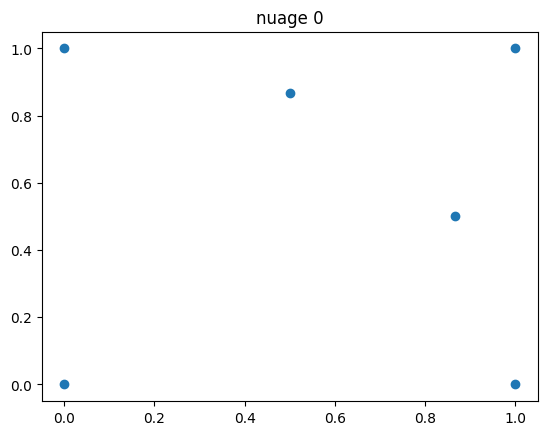

In [19]:
#print_nuage(nuage0)

aff_nuage(nuage0, "nuage 0")
#aff_nuage(nuage0, "./fig_nuage/nuage0")

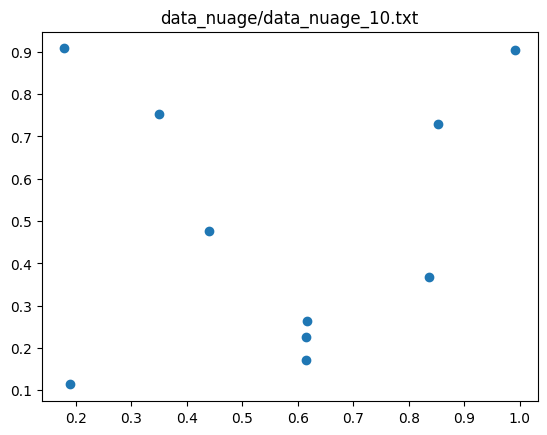

In [20]:
aff_nuage(n10, "data_nuage/data_nuage_10.txt")

On va développer progressivement un module `geometrie2d`.

## `geometrie2d`: orientation de 3 points du plan

![Orientations d'un triplet (p,q,r)](./fig/orientation_pqr.png)

Un triplet `(p,q,r)` de points *non alignés* du plan est *orienté
positivement* si l'angle des vecteurs `(pq, pr)` est dans $]0, \pi \ [$
(modulo $2\pi$). Sinon, il est *orienté négativement*.

On vérifie l'orientation du triplet `(p,q,r)` en calculant le signe du
déterminant 2x2 $det(pq,pr)$ des vecteurs `pq` et `pr`. Signe du
déterminant et sens d'orientation coïncident.

On rappelle que :
$$det(pq,pr) = (x_q - x_p)\times(y_r - y_p) - (y_q - y_p)\times(x_r -
x_p).$$
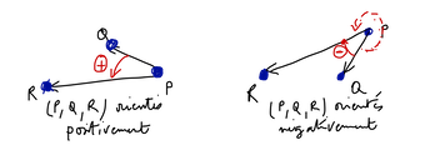

### `orientation()`

Commencer le module `geometrie2d` avec une fonction qui calcule l'orientation d'un triplet de points du plan.

In [21]:
# geometrie2D

def orientation(p: Points, q: Points, r: Points) -> int:
    '''sens direct, signe positif -> +1
    sens indirect, signe négatif -> -1'''
    d = (q[0] - p[0]) * (r[1] - p[1]) - (q[1] - p[1]) * (r[0] - p[0])
    assert d != 0 # p,q,r non alignés
    if d > 0:
        return 1
    return -1                                                    

In [22]:
assert orientation(origine, p_i, p_j) == 1
assert orientation(origine, p_j, p_i) == -1
assert orientation(p_i, origine, p_j) == -1
assert orientation(origine, p_i, p_pi3) == 1
assert orientation(p_11, p_i, origine) == -1
assert orientation(p_11, p_pi6, origine) == -1

## `geometrie2d`: enveloppe convexe

Un ensemble $C$ est *convexe* si le segment \[p,q\] qui relie deux
points quelconques de $C$ est inclus dans $C$.

![exemple d'ensembles convexes et non
convexe](./fig/convexes.png)

L'*enveloppe convexe* $Conv(N)$ d'un nuage de points $N$ est le plus
petit polygone convexe qui contient tous les points de $N$.

![L'enveloppe convexe du nuage de points
‘data_nuage_10.txt'](./fig/env_conv10.png) ![L'enveloppe
convexe du nuage de points
‘data_nuage_100.txt'](./fig/env_conv100.png)
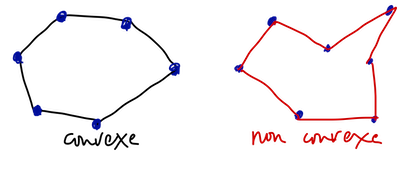
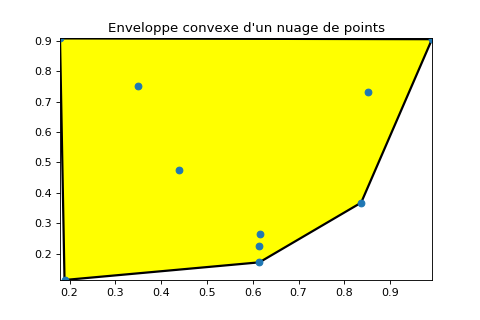
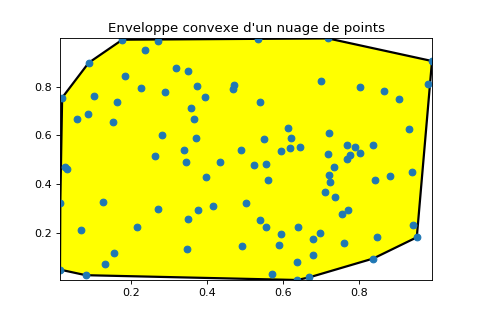

### Construire l'enveloppe convexe d'un nuage de points 

Il existe plusieurs algorithmes. 
Nous utiliserons l'algorithme de Graham-Andrew qui s'appuie sur un balayage du nuage de points préalablement triés. 

**Hypothèse importante : aucun triplet de points alignés**

Dans un premier temps, il est plus facile de supposer qu'aucun triplet $(p, q, r)$ du nuage de points ne sont alignés.

On choisira d'arrêter le traitement d'un éventuel nuage qui ne vérifie pas cette hypothèse.

**Algorithme de Graham-Andrew.**

On construit $Conv(N)$ en balayant de gauche à droite avec une droite verticale le
nuage $N$ préalablement trié par ordre croissant. 
On convient ainsi que p0 est le plus petit point de N, *ie.* celui le plus à gauche.

Chaque point p rencontré par la droite met à jour l'enveloppe convexe du sous-nuage à gauche du point p.  
Cette mise à jour s'effectue en distinguant une partie supérieure et une partie inférieure de l'enveloppe convexe.

L'*enveloppe supérieure* est au dessus du segment \[p0, p\]. 
Cette enveloppe `ES` est modifiée par l'algorithme suivant qui justifie de stocker `ES` comme une pile de base p0. On ajoute aussi à `ES`, p1 le point immédiatement supérieur à p0 (*ie.* immédiatement à droite de p0).
La pile `ES` est ainsi composée d'au moins deux éléments.

Soit p le point rencontré par le balayage de N. 
Notons q et r les deux derniers points ajoutés à `ES` -- q est au sommet.

-   Si le triplet (p,q,r) est orienté positivement alors p est ajouté à
    `ES`. Ce qui termine la mise à jour de `ES`.
-   Sinon q est retiré de `ES` et on reprend le test d'orientation et le
    traitement précédent pour **un nouveau triplet (p,q,r)** jusqu'à
    terminer la mise à jour de `ES` :
    -   par l'ajout de p à `ES`  
    -   ou parce qu'il ne reste que p0 dans `ES`. Dans ce cas, on
        termine en ajoutant p à `ES` – qui est ainsi toujours composée
        d'au moins deux éléments.

`ES` contient l'enveloppe convexe supérieure du nuage N une fois tous
les points p de N balayés.

On convient aisément que le point le plus à droite de N est le dernier
point ajouté à `ES`.

**Illustration graphique.**

`ES` = {0,1,5,6}, début du traitement de p = 7

![Orientation (7,6,5) négative](./fig/ES-1.png)

`ES` = {0,1,5}, p = 7

![Orientation (7,5,1) négative](./fig/ES-2.png)

`ES` = {0,1}, p = 7

![Orientation (7,1,0) positive](./fig/ES-3.png)

`ES` = {0,1,7}, fin du traitement de p = 7.
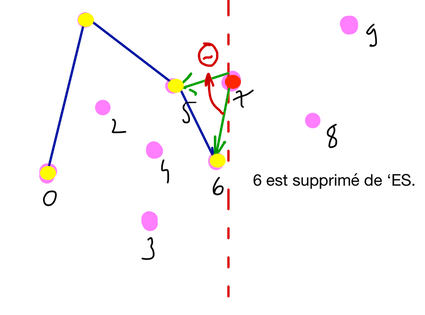
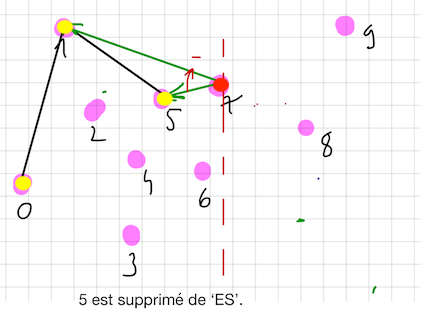
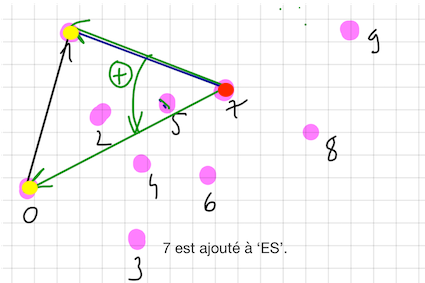

### `maj_es()` : enveloppe convexe supérieure

Compléter le module précédent avec une fonction `majES(pile, point)` qui
effectue la mise à jour de la pile `ES` lors du traitement du point p. 

In [23]:
def maj_es(es: list[Points], p: Points) -> None:
    '''construit l'envel. conv. supérieure'''
    assert len(es) > 1 # au moins 2 points q et r dans es

    q = es[-1]
    r = es[-2]
    # ajout direct
    if orientation(p, q, r) > 0:
        es.append(p)
        return None

    # on dépile récursivement et on tente d'ajouter p 
    es.pop()
    
    # terminaison
    if len(es) == 1: # p0 seul dans es
        es.append(p)
        return None
    else: # au moins q et r (==p0) dans es
        maj_es(es, p)
        

### Validation

Valider cette fonction sur des nuages de 4 ou 5 points par exemple.

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0)]


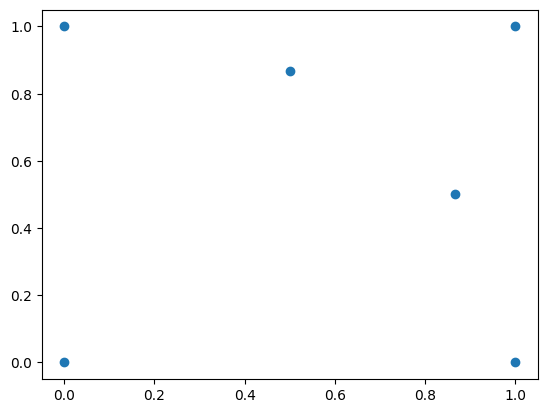

In [24]:
trier_nuage(nuage0)
es = [nuage0[0], nuage0[1]]
for p in nuage0[2:]:
    maj_es(es, p)
aff_nuage(nuage0)
print(es)
assert es == [origine, p_j, p_11]

### `maj_ei()`: enveloppe convexe inférieure 

L'*enveloppe convexe inférieure* est obtenue de façon similaire avec une
(autre) pile ‘EI' et un test d'orientation inverse.

Compléter le module précédent avec une fonction `majEI(pile, point)` qui
effectue la mise à jour de la pile ‘EI' lors du traitement du point p. 

In [25]:
def maj_ei(ei: list[Points], p: Points) -> None:
    '''construit l'envel. conv. inférieure'''
    assert len(ei) > 1 # au moins 2 points q et r dans ei

    q = ei[-1]
    r = ei[-2]
    # ajout direct
    if orientation(p, q, r) < 0:
        ei.append(p)
        return None

    # on dépile récursivement et on tente d'ajouter p 
    ei.pop()
    
    # terminaison
    if len(ei) == 1: # p0 seul dans ei
        ei.append(p)
        return None
    else: # au moins q et r (==p0) dans ei
        maj_ei(ei, p)
        

### Validation

Valider cette fonction sur des nuages de 4 ou 5 points par exemple.

-1
[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0)]


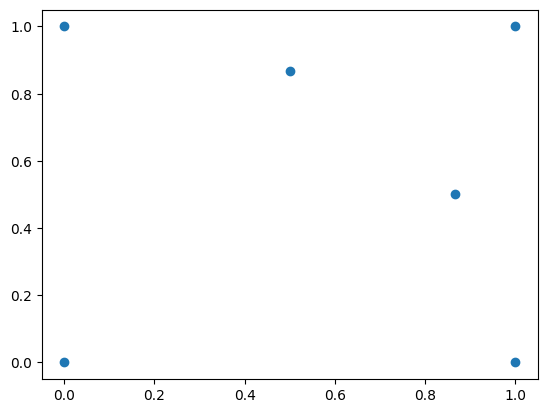

In [26]:
print(orientation(p_11, p_i, origine))
trier_nuage(nuage0)
#print_nuage(nuage0)
ei = [nuage0[0], nuage0[1]]
for p in nuage0[2:]:
    maj_ei(ei, p)
aff_nuage(nuage0)
print(ei)
assert ei == [origine, p_i, p_11]

## `geometrie2d`: enveloppe convexe

L'enveloppe convexe $Conv(N)$ est une (autre) pile construite à partir
de `ES` et `EI` en stockant successivement chaque point visité par les 2
parcours suivants :  
- L'enveloppe convexe supérieure est parcourue de la gauche vers la
droite,  
- l'enveloppe convexe inférieure est parcourue de la droite vers la
gauche;  
et modifié comme suit :  
- l'extrémité droite de l'une et de l'autre de ces enveloppes n'est pas
répétée,  
- le sommet de $Conv(N)$ répète sa base p0.

### `env_convexe()`

Compléter le module précédent avec une fonction `env_convexe(nuage)` qui
construit l'enveloppe convexe d'un nuage de points arbitraire.

In [27]:
a = [i for i in range(5)]
b = [k for k in a[-2:0:-1]]
print(b)

[3, 2, 1]


In [28]:
def env_convexe(nuage: list[Points]) -> list[Points]:
    assert len(nuage) > 2
    
    trier_nuage(nuage)
    
    es = [nuage[0], nuage[1]]
    for p in nuage[2:]:
        maj_es(es, p)
    
    ei = [nuage[0], nuage[1]]
    for p in nuage[2:]:
        maj_ei(ei, p)
        
    e = [p for p in es]    
    if ei[-1] == es[-1]:
        ee = [p for p in ei[-2:0:-1]]
    else:
        ee = [p for p in ei[-1:0:-1]] 
        
    return  e + ee + [es[0]]

### Validation

In [29]:
print(env_convexe(nuage0))

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]


### `print_env()`

Compléter le module précédent avec une fonction qui permet d'afficher l'enveloppe convexe ainsi construite.

In [30]:
def print_env(e: list[Points]) -> None:
    '''fonction peu intéressante'''
    for p in e:
        print(p)

In [31]:
print_env(env_convexe(nuage0))

(0.0, 0.0)
(0.0, 1.0)
(1.0, 1.0)
(1.0, 0.0)
(0.0, 0.0)


### `aff_nuage_env()`

Compléter le module précédent avec une fonction qui permet de tracer graphiquement cette enveloppe convexe, d'abord sans le nuage de points associé, puis avec.

In [32]:
def aff_nuage(nuage : Nuages, env : bool = False, title: str = None, filename: str = None) -> None:
    
    fig, ax = plt.subplots()
    x = [p[0] for p in nuage]
    y = [p[1] for p in nuage]
    ax.plot(x, y, "o")
    
    if env:
        e = env_convexe(nuage)
        ex = [p[0] for p in e]
        ey = [p[1] for p in e]
        ax.plot(ex, ey, "+-r")
    
    if title:
        ax.set_title(title)
    
    if filename:
        fig.savefig(filename+".jpeg")  

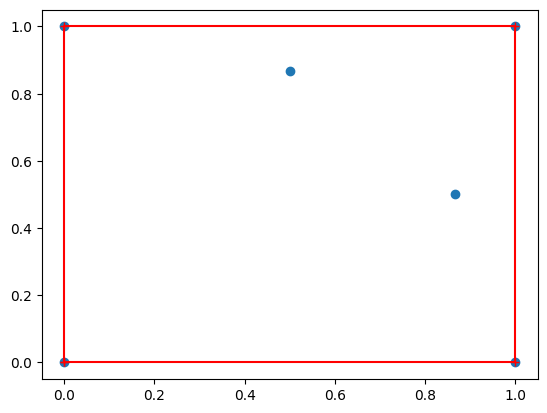

In [33]:
aff_nuage(nuage0, env=True)

### Application à `n10`

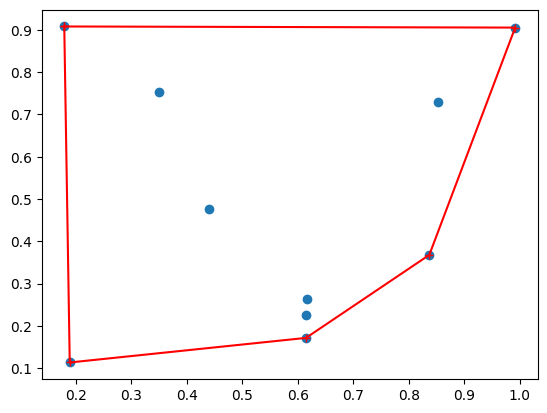

In [34]:
aff_nuage(n10, env=True)

### Application à `n100`

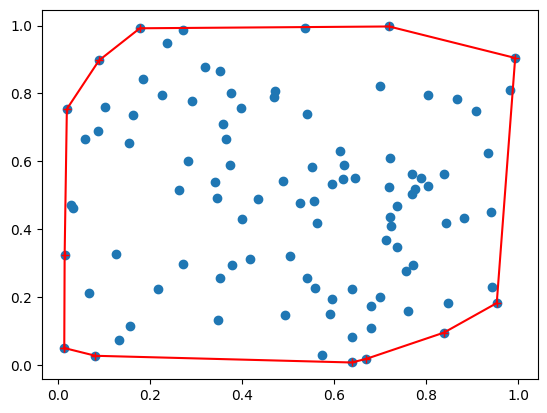

In [35]:
n100 = read_nuage("./data_nuage/data_nuage_100.txt")
aff_nuage(n100, env = True)